<h1 style='color: green; font-size: 36px; font-weight: bold;'>Data Science - Linear Regression II</h1>

# <font color='grey' style='font-size: 30px;'>1.2 Data </font>
<hr style='border: 2px solid grey;'>

## Importing pandas library

https://pandas.pydata.org/

In [225]:
import pandas as pd

## The Dataset and the Project
<hr>

### Data:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>Value</b> - Value (R$) of the property offered</li>
    <li><b>Area</b> - Property area in m²</li>
    <li><b>Dist_Praia</b> - Distance from the property to the beach (km) (as the crow flies)</li>
    <li><b>Dist_Farmacia</b> - Distance from the property to the nearest pharmacy (km) (as the crow flies)</li>
</ul>

## Data reading

In [226]:
data = pd.read_csv('./dados_RegressaoLinear/dataset.csv', sep=';')

In [227]:
data = data.rename(columns={'Valor': 'Value', 'Dist_Praia': 'Beach_Dist', 'Dist_Farmacia': 'Pharm_Dist'})

## Viewing data

In [228]:
data.head()

,Value,Area,Beach_Dist,Pharm_Dist
0,4600000,280,0.240925,0.793637
1,900000,208,0.904136,0.134494
2,2550000,170,0.059525,0.423318
3,550000,100,2.883181,0.525064
4,2200000,164,0.239758,0.192374


## Checking the dataset size

In [229]:
data.shape

(5000, 4)

# <font color='Grey' style='font-size: 30px;'>1.3 Preliminary Analysis</font>
<hr style='border: 2px solid grey;'>

## Descriptive statistics

In [230]:
data.describe().round(2)

,Value,Area,Beach_Dist,Pharm_Dist
count,5000.00,5000.00,5000.00,5000.00
mean,1402926.39,121.94,3.02,0.50
std,1883268.85,90.54,3.17,0.29
min,75000.00,16.00,0.00,0.00
25%,460000.00,70.00,0.44,0.24
50%,820000.00,93.00,1.48,0.50
75%,1590000.00,146.00,5.61,0.75
max,25000000.00,2000.00,17.96,1.00


## Correlation matrix

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>correlation coefficient</b> is a measure of the linear association between two variables and lies between <b>-1</b> e <b>+1</b> sendo que <b>-1</b> indicates perfect negative association and <b>+1</b> indicates perfect positive association.</p>

In [231]:
data.corr().round(4)

,Value,Area,Beach_Dist,Pharm_Dist
Value,1.0000,0.7110,-0.3665,-0.0244
Area,0.7110,1.0000,-0.2834,-0.0310
Beach_Dist,-0.3665,-0.2834,1.0000,0.0256
Pharm_Dist,-0.0244,-0.0310,0.0256,1.0000


# <font color='grey' style='font-size: 30px;'>2.1 Behavior of the Dependent Variable (Y)</font>
<hr style='border: 2px solid grey;'>

## Importing Seaborn
https://seaborn.pydata.org/
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing statistical plots.</p>

In [232]:
import seaborn as sns

## Chart Formatting Settings

In [233]:
# palette -> Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r
sns.set_palette("Accent")
# style -> white, dark, whitegrid, darkgrid, ticks
sns.set_style("darkgrid")

## Box plot of the *dependent* variable (y)

<img width='700px' src='../data/img/Box-Plot.png'>

https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot

<Axes: title={'center': 'Property Prices'}, xlabel='Reais'>

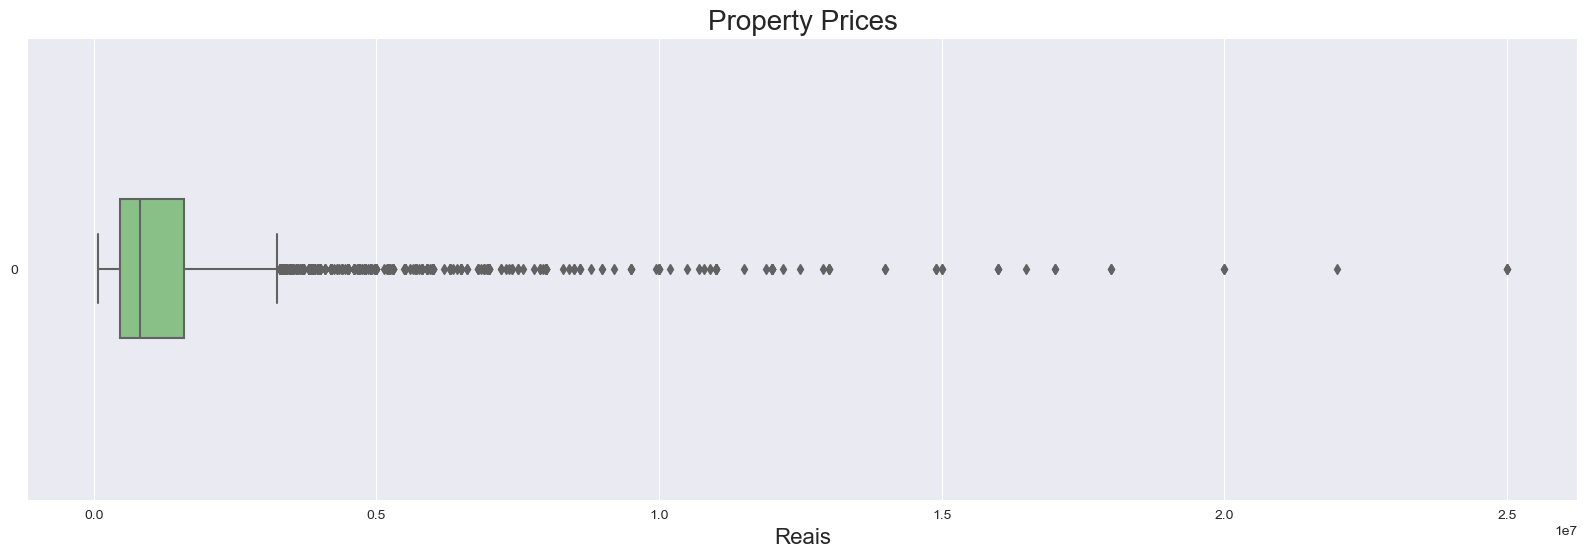

In [234]:
ax = sns.boxplot(data=data['Value'], orient='h', width=0.3)
ax.figure.set_size_inches(20, 6)
ax.set_title('Property Prices', fontsize=20)
ax.set_xlabel('Reais', fontsize=16)
ax

# <font color='grey' style='font-size: 30px;'>2.2 Frequency Distribution</font>
<hr style='border: 2px solid grey;'>

## Frequency distribution of the *dependent* variable (y)

https://seaborn.pydata.org/generated/seaborn.distplot.html?highlight=distplot#seaborn.distplot

<Axes: title={'center': 'Frequency Distribution'}, xlabel='Property Prices (R$)', ylabel='Count'>

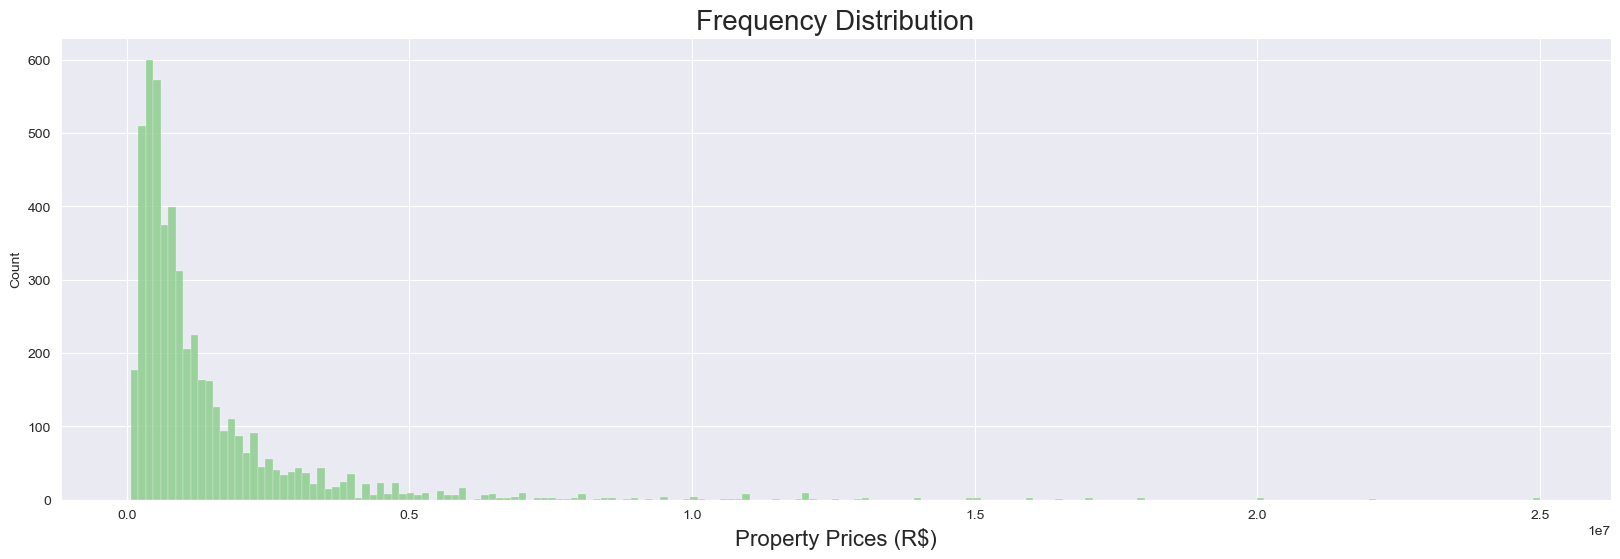

In [235]:
ax = sns.histplot(data['Value'])
ax.figure.set_size_inches(20, 6)
ax.set_title('Frequency Distribution', fontsize=20)
ax.set_xlabel('Property Prices (R$)', fontsize=16)
ax

<img width='800px' src='../data/img/Box-Plot II.png'>

# <font color='grey' style='font-size: 30px;'>2.3 Dispersion Among Variables</font>
<hr style='border: 2px solid grey;'>

## Scatter plots between the dataset variables

## seaborn.pairplot

https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Plots the relationship between pairs of variables in a dataset.</p>

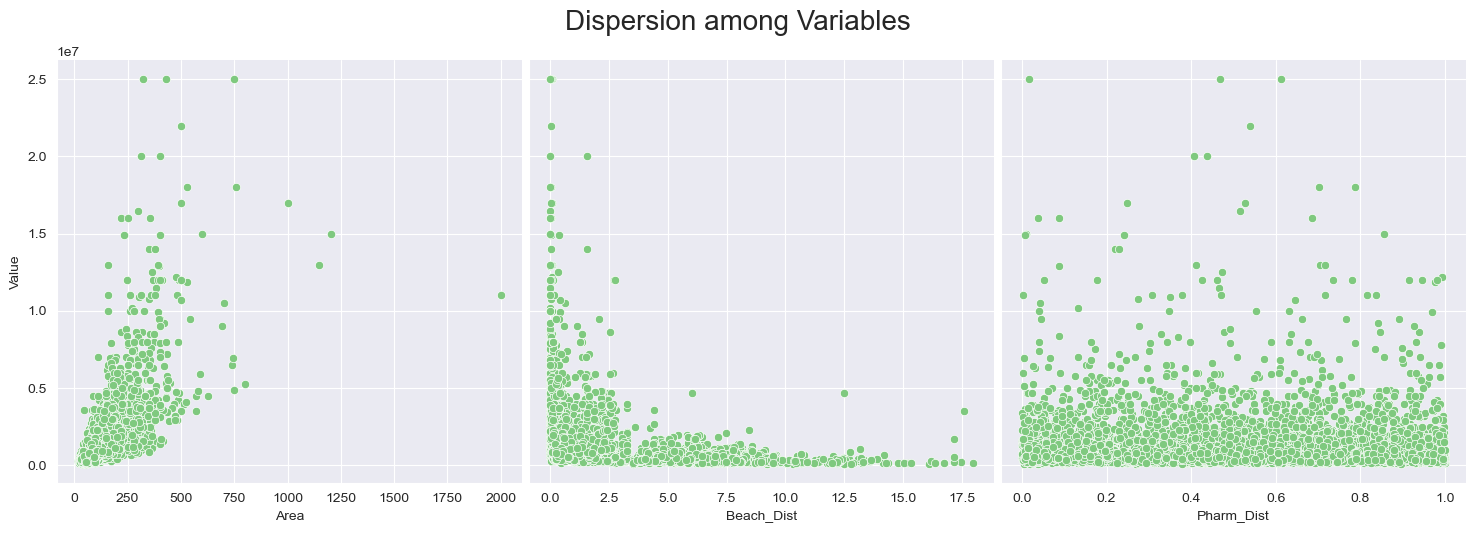

In [236]:
ax = sns.pairplot(data, y_vars=['Value'], x_vars=['Area', 'Beach_Dist', 'Pharm_Dist'], height=5)
ax.fig.suptitle('Dispersion among Variables', fontsize=20, y=1.05)
ax

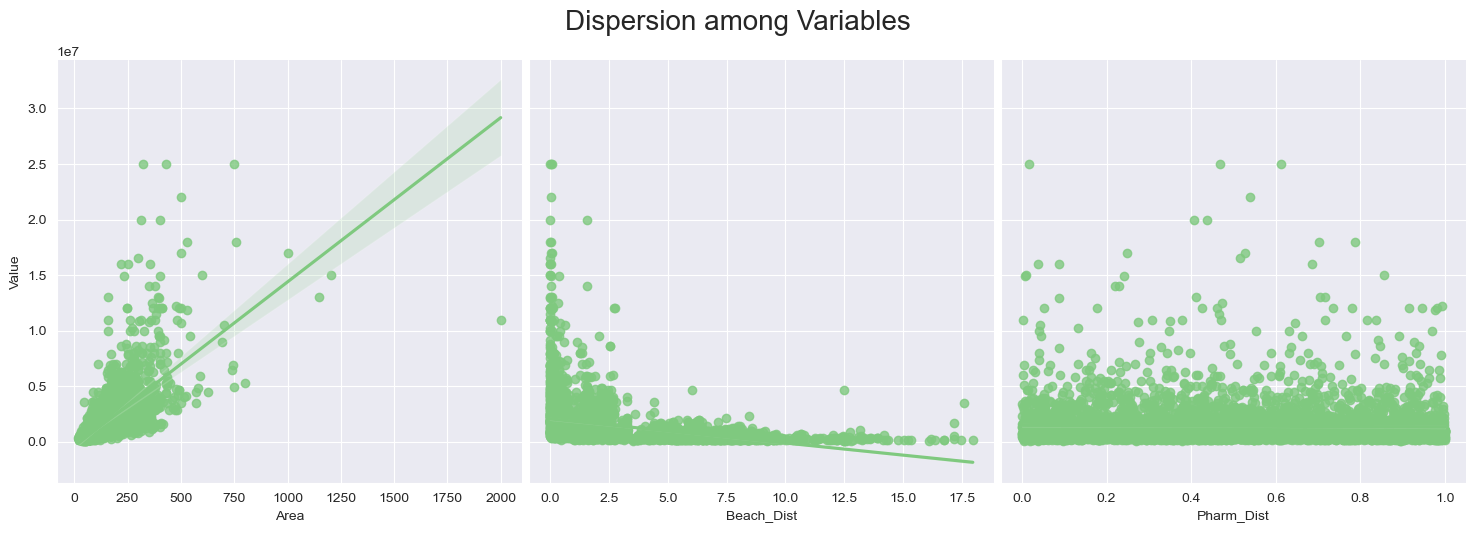

In [237]:
ax = sns.pairplot(data, y_vars=['Value'], x_vars=['Area', 'Beach_Dist', 'Pharm_Dist'], kind='reg', height=5)
ax.fig.suptitle('Dispersion among Variables', fontsize=20, y=1.05)
ax

# <font color='grey' style='font-size: 30px;'>3.1 Transforming the data</font>
<hr style='border: 2px solid grey;'>

## Normal distribution
<hr>

### Why?
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Parametric tests assume that the sample data has been collected from a population with a known probability distribution. Most statistical tests assume that the data follow a normal distribution (Student's t, confidence intervals, etc.).</p>



<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>

## Importing numpy

In [238]:
import numpy as np

## Applying the logarithmic transformation to the *dataset* data

https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.log.html

In [239]:
data['log_Value'] = np.log(data['Value'])
data['log_Area'] = np.log(data['Area'])
data['log_Beach_Dist'] = np.log(data['Beach_Dist'] + 1)
data['log_Pharm_Dist'] = np.log(data['Pharm_Dist'] + 1)

## Frequency distribution of the transformed *dependent variable* (y)

<Axes: title={'center': 'Frequency Distribution'}, xlabel='property price log', ylabel='Count'>

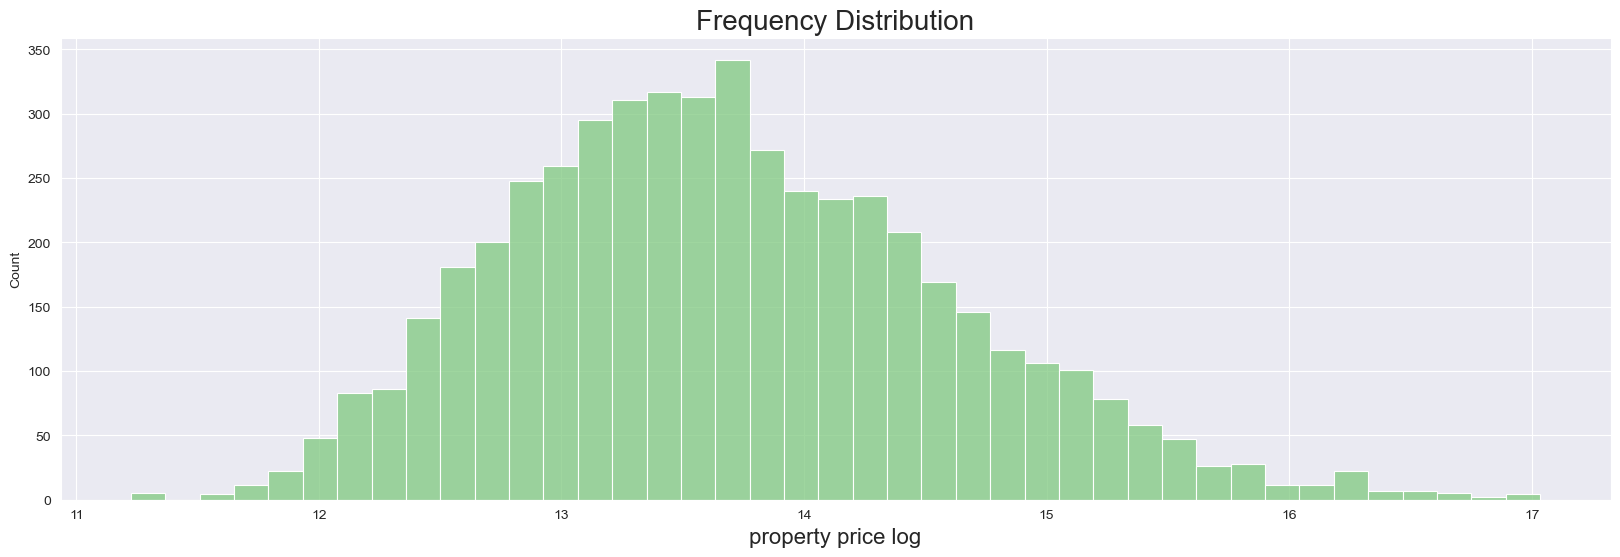

In [240]:
ax = sns.histplot(data['log_Value'])
ax.figure.set_size_inches(20, 6)
ax.set_title('Frequency Distribution', fontsize=20)
ax.set_xlabel('property price log', fontsize=16)
ax

# <font color='grey' style='font-size: 30px;'>3.2 Checking Linear Relationship</font>
<hr style='border: 2px solid grey;'>

## Scatter plots between the transformed variables of the dataset

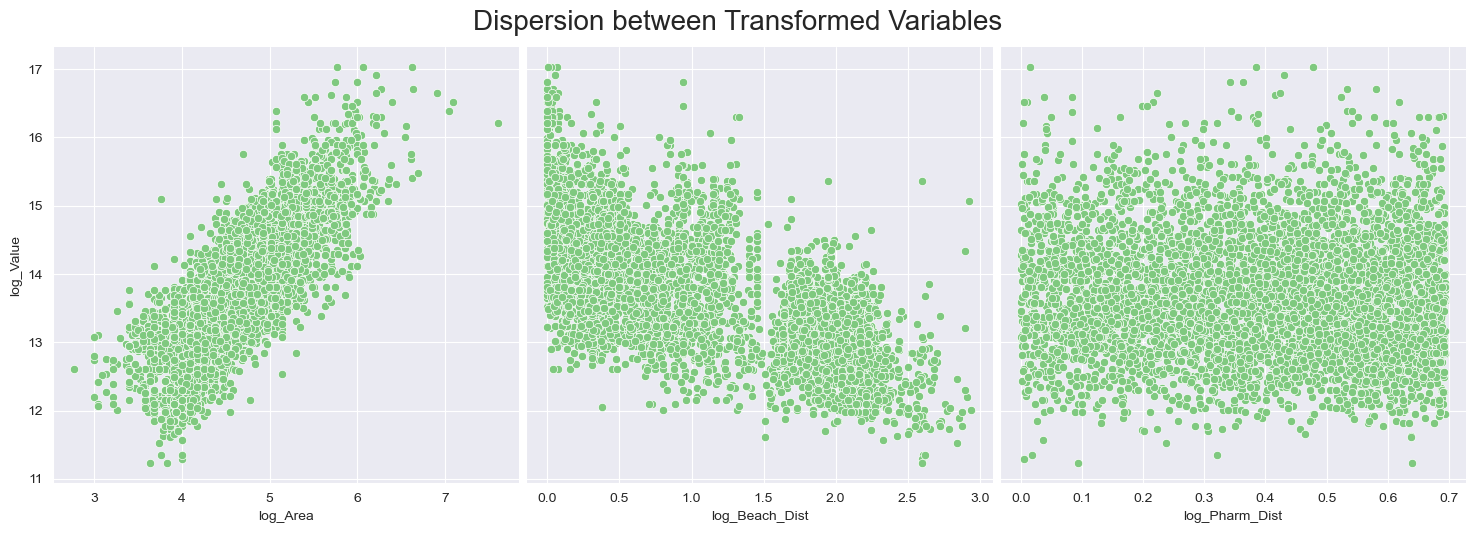

In [241]:
ax = sns.pairplot(data, y_vars='log_Value', x_vars=['log_Area', 'log_Beach_Dist', 'log_Pharm_Dist'], height=5)
ax.fig.suptitle('Dispersion between Transformed Variables', fontsize=20, y=1.05)
ax

# <font color='grey' style='font-size: 30px;'>4.1 Creating the Training and Testing *Datasets</font>
<hr style='border: 2px solid grey;'>

## Importing *train_test_split* from the *scikit-learn* library

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [242]:
from sklearn.model_selection import train_test_split 

## Creating a Series (pandas) to store the Real Estate Price (y)

In [243]:
y = data['log_Value']

## Creating a DataFrame (pandas) to store the explanatory variables (X)

In [244]:
x  = data[['log_Area', 'log_Beach_Dist', 'log_Pharm_Dist']]

## Creating the training and test datasets

In [245]:
x_train, x_test, y_train, y_test =  train_test_split(x, y, test_size=0.2, random_state=2811)

# Linear Regression
<hr>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Regression analysis concerns the study of the dependence of a variable (the <b>dependent variable</b>) on one or more variables, the explanatory variables, with the aim of estimating and/or predicting the mean value of the former in terms of the known or fixed values of the latter.</p>


## scikit-learn (https://scikit-learn.org/stable/)

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>The *scikit-learn* is a Python module specialized in solutions for *machine learning*..</p>



<img width='800px' src='../data/img/Log-linear.png'>

## Importing the statsmodels library

https://www.statsmodels.org/stable/index.html

In [246]:
import statsmodels.api as sm

## Estimating the model with statsmodels

In [247]:
x_train_constant = sm.add_constant(x_train)

In [248]:
x_train_constant.head()

,const,log_Area,log_Beach_Dist,log_Pharm_Dist
2661,1.0,5.945421,0.000000,0.382273
912,1.0,3.135494,0.972865,0.605015
3042,1.0,4.317488,1.794961,0.486594
141,1.0,3.401197,0.310455,0.599609
3854,1.0,5.676754,0.032193,0.101903


In [249]:
# OLS is the estimation method

In [250]:
model_statsmodels = sm.OLS(y_train, x_train_constant, hasconst = True).fit()

# <font color='grey' style='font-size: 30px;'>4.2 Evaluating the Estimated Model</font>
<hr style='border: 2px solid grey;'>

In [251]:
model_statsmodels.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_Value   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     5495.
Date:                Wed, 05 Jul 2023   Prob (F-statistic):               0.00
Time:                        21:29:45   Log-Likelihood:                -2044.9
No. Observations:                4000   AIC:                             4098.
Df Residuals:                    3996   BIC:                             4123.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              9.3417      0.060    154.734      0.000       9.223       9.460
log_Area           1.0580      0.012     89.320      0.000       1.035       1.081
log_Beach_Dist    -0.4905      0.009    -56.690      0.000      -0.508      -0.474
log_Pharm_Dist    -0.0167      0.032     -0.521      0.603      -0.080       0.046
==============================================================================
Omnibus:                       64.751   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              106.858
Skew:                           0.136   Prob(JB):                     6.25e-24
Kurtosis:                       3.753   Cond. No.                         47.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Evaluating the model's test statistics

# <font color='grey' style='font-size: 30px;'>4.3 Modifying the Model and Evaluating the Fit Again</font>
<hr style='border: 2px solid grey;'>

## Creating a new set of explanatory variables (X)

In [252]:
x = data[['log_Beach_Dist', 'log_Area']]

## Creating the training and test datasets

In [253]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2811) 

## Estimating the model with statsmodels

In [254]:
x_train_constant = sm.add_constant(x_train)
model_statsmodels = sm.OLS(y_train, x_train_constant, hasconst = True).fit()

## Evaluating the test statistics of the new model

In [255]:
model_statsmodels.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_Value   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     8244.
Date:                Wed, 05 Jul 2023   Prob (F-statistic):               0.00
Time:                        21:29:45   Log-Likelihood:                -2045.1
No. Observations:                4000   AIC:                             4096.
Df Residuals:                    3997   BIC:                             4115.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              9.3349      0.059    158.353      0.000       9.219       9.450
log_Beach_Dist    -0.4906      0.009    -56.709      0.000      -0.508      -0.474
log_Area           1.0581      0.012     89.345      0.000       1.035       1.081
==============================================================================
Omnibus:                       65.115   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              107.712
Skew:                           0.136   Prob(JB):                     4.08e-24
Kurtosis:                       3.757   Cond. No.                         46.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# <font color='grey' style='font-size: 30px;'>5.1 Estimating the model with the training data</font>
<hr style='border: 2px solid grey;'>

## Importing *LinearRegression* and *metrics* from the *scikit-learn* library

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://scikit-learn.org/stable/modules/classes.html#regression-metrics

In [256]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Instantiating the class *LinearRegression()*

In [257]:
model = LinearRegression()

## Using the *fit()* method of the "model" object to estimate our linear model using the TRAIN data (y_train and X_train)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit

In [258]:
model.fit(x_train, y_train)

LinearRegression()

## Obtaining the coefficient of determination (R²) of the model estimated with the TRAIN data

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score

### Coefficient of Determination - R²

The coefficient of determination (R²) is a summary measure that tells you how well the regression line fits the data. It is a value between 0 and 1.

$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}{\sum_{i=0}^{n-1}(y_i-\bar{y}_i)^2}$$

In [259]:
print('R² = {}'.format(model.score(x_train, y_train).round(3)))

R² = 0.805


## Generating predictions for the TEST (X_test) data using the *predict()* method of the "model" object

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict

In [260]:
y_previsto = model.predict(x_test)

## Obtaining the coefficient of determination (R²) for the predictions of our model

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score

In [261]:
print('R² %s' % metrics.r2_score(y_test, y_previsto).round(3))

R² 0.79


# <font color='grey' style='font-size: 30px;'>5.2 Getting Spot Forecasts</font>
<hr style='border: 2px solid grey;'>

## Entry data

In [262]:
entry = x_test[0:1]
entry

,log_Beach_Dist,log_Area
1006,1.282769,5.273


## Generating a point forecast

In [263]:
model.predict(entry)[0] #The value is in logarithm, we must transform it

14.28482006184788

## Inverting the transformation to obtain the estimate in R$

https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.exp.html

In [264]:
np.exp(model.predict(entry)[0])

1598889.784779439

# <font color='grey' style='font-size: 30px;'>5.3 Interpreting the Estimated Coefficients</font>
<hr style='border: 2px solid grey;'>

## Obtaining the model intercept

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>The <b>intercept</b> represents the average effect on $Y$ (Real Estate Price) with all explanatory variables excluded from the model. In the case of the log-linear model this coefficient must be transformed using the exponential function to be presented in $Y$.</p>

In [270]:
model.intercept_

9.334916409800332

In [271]:
np.exp(model.intercept_)

11326.681428069882

## Obtaining the regression coefficients

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Os <b>coeficientes de regressão</b> $\beta_2$ e $\beta_3$ são conhecidos como <b>coeficientes parciais de regressão</b> ou <b>coeficientes parciais angulares</b>. </p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>An interesting aspect of the log-linear model, which has made it widely used in applied work, is that the angular coefficients $\beta_2$ and $\beta_3$ measure the elasticities of Y with respect to $X_2$ and $X_3$, that is, the percentage change in Y corresponding to a given (small) percentage change in $X_2$ and $X_3$.</p>

In [272]:
model.coef_

array([-0.49061226,  1.05807818])

## Confirming the order of the explanatory variables in the DataFrame

In [273]:
x.columns

Index(['log_Beach_Dist', 'log_Area'], dtype='object')

## Creating a list of model variable names

In [279]:
index = ['Intercept', 'log Beach Distance', 'log Area']

## Creating a DataFrame to store the model's coefficients

https://docs.scipy.org/doc/numpy/reference/generated/numpy.append.html?#numpy.append

In [280]:
pd.DataFrame(data = np.append(model.intercept_, model.coef_), index = index, columns = ['Parameters'])

,Parameters
Intercept,9.334916
log Beach Distance,-0.490612
log Area,1.058078


## Interpreting the Estimated Coefficients

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
 Excluding the effect of the explanatory variables ($X_2=X_3=0$) the average effect on Property Prices would be <b>R$11,326.68</b> (exp[9.334916]).
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Area (m²)</b> → Holding the value of $X_3$ (Area) constant, a 1% increase in the Area of a property generates, on average, a <b>1.06%</b> increase in the Property Price.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Distance to the Beach (km)</b> → Holding the value of $X_2$ (Distance to the Beach) constant, a 1% increase in the Distance from a property to the beach generates, on average, a <b>0.49%</b> decrease in the Property Price.
</p>

# <font color='grey' style='font-size: 30px;'>5.4 Graphical Analysis of Model Results</font>
<hr style='border: 2px solid grey;'>

## Generating the model predictions for the TRAINING date

In [281]:
y_predict_train = model.predict(x_train)

## Scatter plot between estimated value and actual value

https://seaborn.pydata.org/generated/seaborn.scatterplot.html

<Axes: title={'center': 'Forecast X Actual'}, xlabel='log price - Forecast', ylabel='price log - Real'>

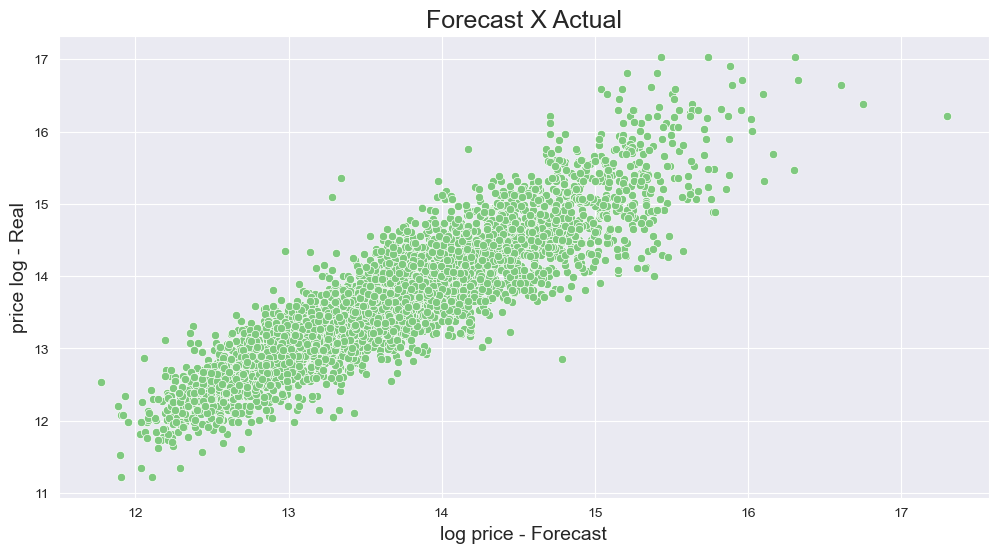

In [282]:
ax = sns.scatterplot(x=y_predict_train, y=y_train)
ax.figure.set_size_inches(12, 6)
ax.set_title('Forecast X Actual', fontsize=18)
ax.set_xlabel('log price - Forecast', fontsize=14)
ax.set_ylabel('price log - Real', fontsize=14)
ax

In [283]:
'''The tighter this straight line, the better the model.
We are doing this example for didactic purposes, the interesting thing would be 
to further improve this data for better prediction.'''


'The tighter this straight line, the better the model.\nWe are doing this example for didactic purposes, the interesting thing would be \nto further improve this data for better prediction.'

## Getting the residue

In [284]:
residue = y_train - y_predict_train

## Plotting the frequency distribution of the residuals

<Axes: title={'center': 'Frequency Distribution of Residues'}, xlabel='price log', ylabel='Count'>

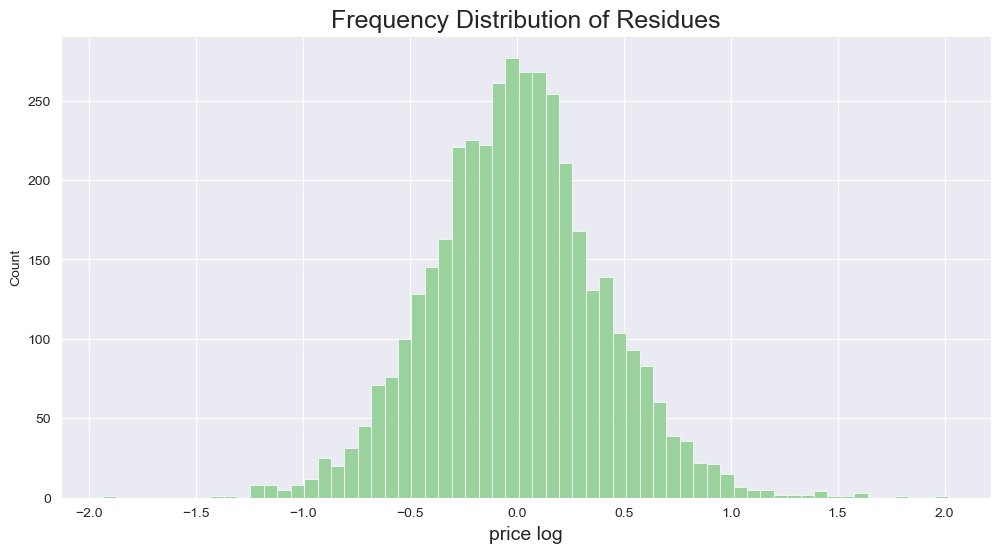

In [285]:
ax = sns.histplot(residue)
ax.figure.set_size_inches(12, 6)
ax.set_title('Frequency Distribution of Residues', fontsize=18)
ax.set_xlabel('price log', fontsize=14)
ax

## CREDITS TO:

This information was learned and developed in the Linear Regression in Machine Learning course on Alura's platform. This course is accessible at:
https://cursos.alura.com.br/course/data-science-modelo-regressao-linear-assimetria-statsmodel/task/49896